# DUI Analysis in the San Diego Area

In [31]:
# Import pandas, numpy, matplotlib
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from pygeocoder import Geocoder
from geopy.geocoders import Nominatim
from geopy.distance import vincenty
import moment



# Cleaning DUI Arrests Data (2007-2013)

The datafile 'incidents-100k.csv'shows all the police incidents in the San Diego area from 2007-2013. It conatins type of incident, date, and location. We will use this data to identify number of DUI arrests in the San Diego area.

link:
http://data.sandiegodata.org/de/dataset/clarinova_com-crime-incidents-casnd-7ba4-extract

In [32]:
# Pull the comprehensive police reported incidents file, dated from 2007 to 2013.
incidents_180 = pd.read_csv('arrests_180_days.csv')
incidents_180.dropna(inplace=True)
incidents_180.head(13)

,agency,Charge_Description_Orig,activityDate,BLOCK_ADDRESS,ZipCode,community
0,SHERIFF,290 VIOLATION AFTER INCARCERATION (F),2/13/17 17:00,9400 BLOCK CHESAPEAKE DRIVE,92123.0,SAN DIEGO
1,SHERIFF,290 VIOLATION AFTER INCARCERATION (F),1/2/17 17:00,9600 BLOCK CHESAPEAKE DRIVE,92123.0,SAN DIEGO
2,SHERIFF,290 VIOLATION AFTER INCARCERATION (F),12/9/16 17:00,9600 BLOCK CHESAPEAKE DRIVE,92123.0,SAN DIEGO
3,SHERIFF,290 VIOLATION AFTER INCARCERATION (F),12/14/16 17:00,0 BLOCK UNKNOWN,92020.0,EL CAJON
4,SHERIFF,290 VIOLATION AFTER INCARCERATION (F),3/28/17 17:00,9400 BLOCK CHESAPEAKE DRIVE,92123.0,SAN DIEGO
5,SHERIFF,290 VIOLATION AFTER INCARCERATION (F),1/25/17 17:00,9400 BLOCK CHESAPEAKE DRIVE,92123.0,SAN DIEGO
6,SHERIFF,290 VIOLATION AFTER INCARCERATION (F),2/13/17 17:00,9400 BLOCK CHESAPEAKE DRIVE,92123.0,SAN DIEGO
7,OCEANSIDE,290 VIOLATION AFTER INCARCERATION (M),3/17/17 10:30,CROUCH STREET / SKYLARK DRIVE,92054.0,OCEANSIDE
8,SHERIFF,290 VIOLATION AFTER INCARCERATION (M),12/19/16 17:00,9600 BLOCK CHESAPEAKE DRIVE,92123.0,SAN DIEGO
9,SHERIFF,290 VIOLATION TRAN 30 DAY UPDATE (F),5/5/17 16:30,9100 BLOCK MISSION GORGE ROAD,92071.0,SANTEE


In [33]:
#we want info on just DUI incidents
dui_incidents_180 = incidents_180[incidents_180['Charge_Description_Orig'].str.contains("DUI")]
dui_incidents_180

,agency,Charge_Description_Orig,activityDate,BLOCK_ADDRESS,ZipCode,community
15932,EL CAJON,DRIVING UNDER INFLUENCE WITHIN 10 YEARS OF PRI...,5/12/17 1:39,700 S BLOCK MAGNOLIA AVENUE,92020.0,EL CAJON
15933,CHULA VISTA,DRIVING UNDER INFLUENCE WITHIN 10 YEARS OF PRI...,3/10/17 0:09,EVANS AVENUE / E L STREET,91911.0,CHULA VISTA
15935,SHERIFF,DRIVING UNDER INFLUENCE WITHIN 10 YEARS OF PRI...,2/3/17 22:25,400 BLOCK ALMOND ROAD,92078.0,SAN MARCOS
18415,EL CAJON,DUI .08 ALC:CAUSING BODILY INJ (F),3/24/17 20:20,N 03RD STREET / E MAIN STREET,92020.0,EL CAJON
18416,OCEANSIDE,DUI .08 ALC:CAUSING BODILY INJ (F),12/22/16 21:28,4000 BLOCK VISTA WAY,92056.0,OCEANSIDE
18417,SHERIFF,DUI .08 ALC:CAUSING BODILY INJ (F),1/7/17 12:40,2700 S BLOCK 101,92007.0,ENCINITAS
18418,ESCONDIDO,DUI .08 ALC:CAUSING BODILY INJ (F),5/7/17 17:30,N ESCONDIDO BOULEVARD / W WASHINGTON AVENUE,92025.0,ESCONDIDO
18419,ESCONDIDO,DUI .08 ALC:CAUSING BODILY INJ (F),4/28/17 18:20,2100 BLOCK CITRACADO PARKWAY,92029.0,ESCONDIDO
18420,ESCONDIDO,DUI .08 ALC:CAUSING BODILY INJ (F),3/24/17 20:05,S CENTRE CITY PARKWAY / W FELICITA AVENUE,92025.0,ESCONDIDO
18422,ESCONDIDO,DUI .08 ALC:CAUSING BODILY INJ (F),3/25/17 20:22,E VALLEY PY LAKE WOHLFORD ROAD,92027.0,ESCONDIDO


In [34]:
#lets geocode the addresses to get lon/lat


# Cleaning DUI Crashes Data (2015-2017)

In [35]:
crashes15_17 = pd.read_csv('pd_collisions_datasd.csv')
crashes15_17.head(5)

,report_id,date_time,police_beat,street_no,street_dir,street_name,street_type,cross_st_dir,cross_st_name,cross_st_type,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
0,500002,1/1/15 0:01,627,3700,,VERMONT,STREET,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR
1,500098,1/1/15 0:01,725,6000,,VISTA SAN ISIDRO,,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR
2,500436,1/1/15 1:35,712,100,E,SAN YSIDRO,BOULEVARD,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,1,0,NaN
3,500166,1/1/15 2:00,438,2600,,RACHEL,,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR
4,500429,1/1/15 2:30,813,4600,,30TH,STREET,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,1,0,MISDEMEANOR


In [36]:
#we want info on just DUI incidents
dui_crashes15_17 = crashes15_17[crashes15_17['charge_desc']=='DUI ALCOHOL AND/OR DRUGS']
dui_crashes15_17.head(5)

,report_id,date_time,police_beat,street_no,street_dir,street_name,street_type,cross_st_dir,cross_st_name,cross_st_type,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
12,500207,1/1/15 7:58,122,800,,TURQUOISE,STREET,,,,23152A,VC,DUI ALCOHOL AND/OR DRUGS,0,0,NaN
242,500338,1/9/15 21:46,242,8400,,WESTMORE,ROAD,,,,23152A,VC,DUI ALCOHOL AND/OR DRUGS,0,0,NaN
506,500572,1/19/15 14:30,517,3000,,C,STREET,,,,23152A,VC,DUI ALCOHOL AND/OR DRUGS,0,0,MISDEMEANOR
652,500680,1/24/15 22:35,451,3400,,COLLEGE,AVENUE,,,,23152A,VC,DUI ALCOHOL AND/OR DRUGS,0,0,NaN
689,500745,1/26/15 8:32,521,1600,,C,STREET,,,,23152A,VC,DUI ALCOHOL AND/OR DRUGS,0,0,NaN


In [37]:
#lets get only the data we would potentially use
dui_crashes15_17 = dui_crashes15_17[['date_time','street_no','street_name','street_type','charge_desc']]
dui_crashes15_17

,date_time,street_no,street_name,street_type,charge_desc
12,1/1/15 7:58,800,TURQUOISE,STREET,DUI ALCOHOL AND/OR DRUGS
242,1/9/15 21:46,8400,WESTMORE,ROAD,DUI ALCOHOL AND/OR DRUGS
506,1/19/15 14:30,3000,C,STREET,DUI ALCOHOL AND/OR DRUGS
652,1/24/15 22:35,3400,COLLEGE,AVENUE,DUI ALCOHOL AND/OR DRUGS
689,1/26/15 8:32,1600,C,STREET,DUI ALCOHOL AND/OR DRUGS
808,1/30/15 22:26,300,DEEP DELL,ROAD,DUI ALCOHOL AND/OR DRUGS
871,2/1/15 19:27,3900,WABASH,AVENUE,DUI ALCOHOL AND/OR DRUGS
965,2/4/15 19:19,400,26TH,STREET,DUI ALCOHOL AND/OR DRUGS
1682,3/1/15 15:20,3900,05TH,AVENUE,DUI ALCOHOL AND/OR DRUGS
1947,3/10/15 7:34,4400,52ND,STREET,DUI ALCOHOL AND/OR DRUGS


In [38]:
#all of the addresses are separated, lets combine them into a single string
address = pd.Series(np.zeros(len(dui_crashes15_17)))
for i in range(0, len(dui_crashes15_17)):
    address[i] = (str(dui_crashes15_17['street_no'].iloc[i]) + " " +
                  str(dui_crashes15_17['street_name'].iloc[i]) + " " +
                  str(dui_crashes15_17['street_type'].iloc[i]))
#address
dui_crashes15_17 = dui_crashes15_17.assign(address = address.values)
dui_crashes15_17
#Now we got a single string as address


,date_time,street_no,street_name,street_type,charge_desc,address
12,1/1/15 7:58,800,TURQUOISE,STREET,DUI ALCOHOL AND/OR DRUGS,800 TURQUOISE STREET
242,1/9/15 21:46,8400,WESTMORE,ROAD,DUI ALCOHOL AND/OR DRUGS,8400 WESTMORE ROAD
506,1/19/15 14:30,3000,C,STREET,DUI ALCOHOL AND/OR DRUGS,3000 C STREET
652,1/24/15 22:35,3400,COLLEGE,AVENUE,DUI ALCOHOL AND/OR DRUGS,3400 COLLEGE AVENUE
689,1/26/15 8:32,1600,C,STREET,DUI ALCOHOL AND/OR DRUGS,1600 C STREET
808,1/30/15 22:26,300,DEEP DELL,ROAD,DUI ALCOHOL AND/OR DRUGS,300 DEEP DELL ROAD
871,2/1/15 19:27,3900,WABASH,AVENUE,DUI ALCOHOL AND/OR DRUGS,3900 WABASH AVENUE
965,2/4/15 19:19,400,26TH,STREET,DUI ALCOHOL AND/OR DRUGS,400 26TH STREET
1682,3/1/15 15:20,3900,05TH,AVENUE,DUI ALCOHOL AND/OR DRUGS,3900 05TH AVENUE
1947,3/10/15 7:34,4400,52ND,STREET,DUI ALCOHOL AND/OR DRUGS,4400 52ND STREET


In [39]:
#lets try parsing dates
import dateparser
for i in range(0, len(dui_crashes15_17)):
    timestring = dui_crashes15_17.iloc[0]['date_time']
    result = dateparser.parse(timestring)
    if ((result.year < 2016) and (result.day < 9) and (result.month <12)):
        dui_crashes15_17.drop(dui_crashes15_17.index[i])

len(dui_crashes15_17)
dui_crashes15_17.head(5)

,date_time,street_no,street_name,street_type,charge_desc,address
12,1/1/15 7:58,800,TURQUOISE,STREET,DUI ALCOHOL AND/OR DRUGS,800 TURQUOISE STREET
242,1/9/15 21:46,8400,WESTMORE,ROAD,DUI ALCOHOL AND/OR DRUGS,8400 WESTMORE ROAD
506,1/19/15 14:30,3000,C,STREET,DUI ALCOHOL AND/OR DRUGS,3000 C STREET
652,1/24/15 22:35,3400,COLLEGE,AVENUE,DUI ALCOHOL AND/OR DRUGS,3400 COLLEGE AVENUE
689,1/26/15 8:32,1600,C,STREET,DUI ALCOHOL AND/OR DRUGS,1600 C STREET


In [91]:
import time
new_crashes = dui_crashes15_17.copy(deep=True)
new_crashes.head(5)

,date_time,street_no,street_name,street_type,charge_desc,address,coordinates
12,1/1/15 7:58,800,TURQUOISE,STREET,DUI ALCOHOL AND/OR DRUGS,800 TURQUOISE STREET,NaN
242,1/9/15 21:46,8400,WESTMORE,ROAD,DUI ALCOHOL AND/OR DRUGS,8400 WESTMORE ROAD,NaN
506,1/19/15 14:30,3000,C,STREET,DUI ALCOHOL AND/OR DRUGS,3000 C STREET,NaN
652,1/24/15 22:35,3400,COLLEGE,AVENUE,DUI ALCOHOL AND/OR DRUGS,3400 COLLEGE AVENUE,NaN
689,1/26/15 8:32,1600,C,STREET,DUI ALCOHOL AND/OR DRUGS,1600 C STREET,NaN


In [92]:
s = pd.Series(len(dui_crashes15_17)+1, name = 'coordinates')
s

0    135
Name: coordinates, dtype: int64

In [105]:
#Next we should use geocoding to get lon/lat of the addresses

for i in range(0, 6): 
    try:
        s[i] = Geocoder.geocode(dui_crashes15_17.iloc[i]['address']).coordinates
        
    except:
        time.sleep(5)
    
   
# Save new dataframe in file "coordinate_crashes.csv"
#dui_crashes15_17['coordinates'] = s.to_frame()
#new_crashes.to_csv('coordinate_crashes.csv', sep=',')
#crashes = pd.read_csv('coordinate_crashes.csv')

In [128]:
s
d = s.to_frame()
type(d)
print(d)

                        coordinates
0  (30.0206764, -90.10265509999999)
1        (32.9178621, -117.1426708)
2         (41.4580185, -96.4925694)
3  (38.9062481, -90.13781209999999)
4          (36.077923, -102.519732)
5         (32.6972057, -117.032704)


In [107]:
df2 = dui_crashes15_17.head(5)
df2

,date_time,street_no,street_name,street_type,charge_desc,address,coordinates
12,1/1/15 7:58,800,TURQUOISE,STREET,DUI ALCOHOL AND/OR DRUGS,800 TURQUOISE STREET,NaN
242,1/9/15 21:46,8400,WESTMORE,ROAD,DUI ALCOHOL AND/OR DRUGS,8400 WESTMORE ROAD,NaN
506,1/19/15 14:30,3000,C,STREET,DUI ALCOHOL AND/OR DRUGS,3000 C STREET,NaN
652,1/24/15 22:35,3400,COLLEGE,AVENUE,DUI ALCOHOL AND/OR DRUGS,3400 COLLEGE AVENUE,NaN
689,1/26/15 8:32,1600,C,STREET,DUI ALCOHOL AND/OR DRUGS,1600 C STREET,NaN


In [133]:
#df2.merge(pd.DataFrame(data = [s.values]*len(s), columns = s.index), left_index=True, right_index=True)
pd.merge(df2, d, how='outer')
df2

#dui_crashes15_17.head(6)

MergeError: No common columns to perform merge on

# Cleaning Alchohol Permits Data

In [21]:
alc_permits = pd.read_csv('abs-licenses-casnd.csv')
alc_permits.head(5)

,last_date,OGC_FID,GEOMETRY,licenses_id,scrape_date,licenseno,status,licensetype,issuedate,exprdate,...,y,city,neighborhood,community,council,tract,business,mailaddress,gcquality,gctype
0,2013-07-09T,1,NaN,NaN,2013-07-09T,413,ACTIVE,51,1951-07-20T,2014-03-31T,...,1.864266e+06,NONE,NONE,NONE,NONE,0076.00,NaN,NaN,0,cns/address
1,2013-07-09T,2,NaN,NaN,2013-07-09T,1414,ACTIVE,41,1978-06-05T,2014-04-30T,...,1.914461e+06,SndSAN,NONE,NONE,NONE,0083.59,Capriccio Italian Restaurant,NaN,0,cns/address
2,2013-07-09T,3,NaN,NaN,2013-07-09T,1419,ACTIVE,21,1964-08-18T,2013-09-30T,...,1.836128e+06,SndCHU,NONE,NONE,NONE,0035.01,Ocean View Liquor,NaN,0,cns/address
3,2013-07-09T,4,NaN,NaN,2013-07-09T,2498,ACTIVE,21,1978-01-01T,2013-08-31T,...,1.853602e+06,SndOCN,NONE,NONE,NONE,0024.01,Market Place The,NaN,0,cns/address
4,2013-07-09T,5,NaN,NaN,2013-07-09T,3803,ACTIVE,48,1977-05-18T,2014-03-31T,...,1.872476e+06,SndPOW,NONE,NONE,NONE,0079.08,Silver Fox Associates Inc,NaN,0,cns/address


In [22]:
# Reduce to pertinent data columns
alc_permits = alc_permits[['last_date', 'status', 'issuedate', 'exprdate', 'lon', 'lat', 'business']]

In [23]:
alc_permits.head(5)

,last_date,status,issuedate,exprdate,lon,lat,business
0,2013-07-09T,ACTIVE,1951-07-20T,2014-03-31T,-117.248361,32.777847,NaN
1,2013-07-09T,ACTIVE,1978-06-05T,2014-04-30T,-117.123423,32.916755,Capriccio Italian Restaurant
2,2013-07-09T,ACTIVE,1964-08-18T,2013-09-30T,-117.113723,32.701524,Ocean View Liquor
3,2013-07-09T,ACTIVE,1978-01-01T,2013-08-31T,-117.117612,32.749524,Market Place The
4,2013-07-09T,ACTIVE,1977-05-18T,2014-03-31T,-117.236281,32.800508,Silver Fox Associates Inc


In [25]:
# Filter out data that may be outside the San Diego area.
# Limit range so that any outliers or typos in data are eliminated

alc_permits = alc_permits.drop(alc_permits[alc_permits['lon'] < -120].index)

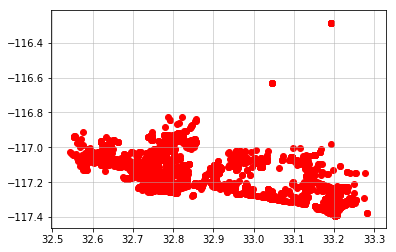

In [26]:
#Alcohol Permits SCATTER PLOTTING

coords = np.zeros(len(alc_permits), dtype=('2float'))

for i in range(0, len(alc_permits)):
    alc_lat = float(alc_permits['lat'].iloc[i])
    alc_lng = float(alc_permits['lon'].iloc[i])
    coords[i] = (alc_lat, alc_lng)

plt.scatter(coords[:,0], coords[:,1], c='red')
# Turn on the grid
plt.grid(linewidth='0.5')
plt.show()

# Visualizing Our Data

In [27]:
#DUI Arrests SCATTER PLOTTING

coords = np.zeros(len(dui_incidents7_13), dtype=('2float'))

for i in range(0, len(dui_incidents7_13)):
    dui_lat = float(dui_incidents7_13['lat'].iloc[i])
    dui_lng = float(dui_incidents7_13['lon'].iloc[i])
    coords[i] = (dui_lat, dui_lng)

plt.scatter(coords[:,0], coords[:,1], c='blue')
# Turn on the grid
plt.grid(linewidth='0.5')
plt.show()



NameError: name 'dui_incidents7_13' is not defined

In [28]:
from sklearn import datasets
from sklearn.cluster import KMeans
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans2, whiten

Length of dui_incidents7_13 dataframe:  4917
Centroids:  [[  418.59044599 -1849.08599731]
 [  416.38886941 -1847.65217535]
 [  419.68626467 -1850.39104125]]


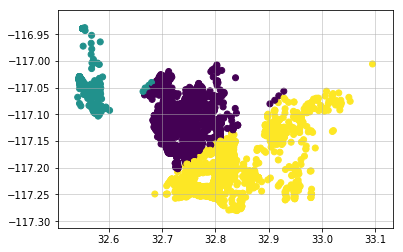

In [9]:
# 1. DUI CLUSTERING
# K-means clustering of hottest parking meters
# Determine whether bus and meter clusters have similar epicenters

# First cluster DUI arrests coordinates.
#coords = np.zeros(len(dui_incidents7_13), dtype=('2float'))

#for i in range(0, len(dui_incidents7_13)):
#    dui_lat = float(dui_incidents7_13['lat'].iloc[i])
#    dui_lng = float(dui_incidents7_13['lon'].iloc[i])
#    coords[i] = (dui_lat, dui_lng)

print("Length of dui_incidents7_13 dataframe: ",len(coords))

x, y = kmeans2(whiten(coords), 3, iter = 20)  
print("Centroids: ",x)

plt.scatter(coords[:,0], coords[:,1], c=y);
plt.grid(linewidth='0.5')
plt.show()

